# Philadelphia Deeper Data Analysis

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

import altair as alt
from vega_datasets import data

import geopandas as gpd
from shapely.geometry import Point
import json
from pandas.io.json import json_normalize

alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In this notebook I want to analyze the relationships between the various aspects of bicycle culture in Philadelphia, more specifically with respect to where things are located and occur..

Now, I need to load the geodata frames, and the map of Philadelphia to do these comparisons. I did not include the Indego Q3 data since the geographical data is about the stations, which is included in the Indego station set. 

In [2]:
# map of Philadelphia 
philly_map_gdf=gpd.read_file('../data/Philadelphia_Data/Neighborhoods_Philadelphia-Copy1.geojson')
# Indego stations
indego_stations_gdf=gpd.read_file('../data/Philadelphia_Data/indego_stations.geojson')
# bike lanes 
new_bike_lanes_gdf=gpd.read_file('../data/Philadelphia_Data/new_bike_lanes_geojson')
# crashes involving cyclists in 2017
bike_crash_gdf=gpd.read_file('../data/Philadelphia_Data/bike_crash.geojson')

To start, let's look at the relationships between various factors and the bike lanes.

First, let's look at bike lanes and car crashes involving cyclists. 

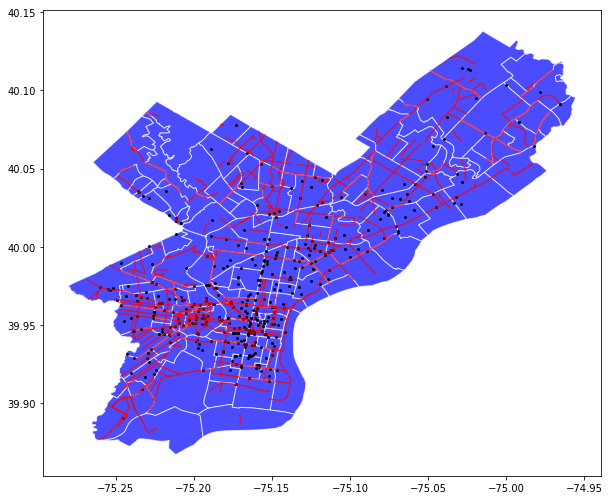

In [3]:
base=philly_map_gdf.plot(color='blue', alpha=0.7, edgecolor='white', figsize=(10,10))
bike_crash_gdf.plot(ax=base, markersize=4, alpha=0.9, color='black')
new_bike_lanes_gdf.plot(ax=base, markersize=4, alpha=0.7, color='red')

What is interesting here is that how accidents involving cyclists by and large are by bike lanes.

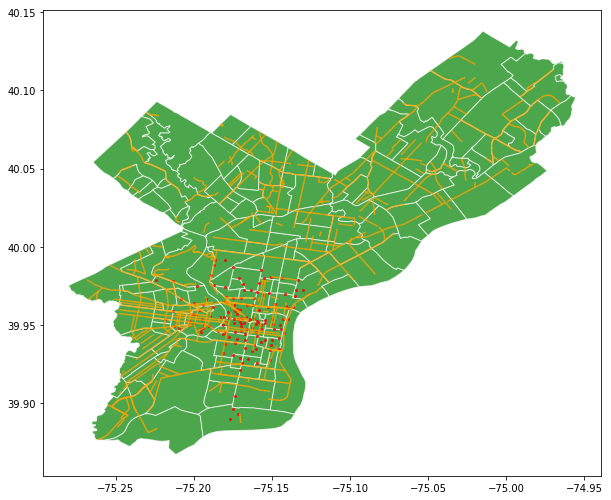

In [4]:
base=philly_map_gdf.plot(color='green', alpha=0.7, edgecolor='white', figsize=(10,10))
indego_stations_gdf.plot(ax=base, markersize=4, alpha=0.8, color='red')
new_bike_lanes_gdf.plot(ax=base, markersize=4, alpha=0.8, color='orange')

It's not really surprising that the stations are also near the bike lanes. 

Now let's see the relationship between Indego stations and bike crashes.

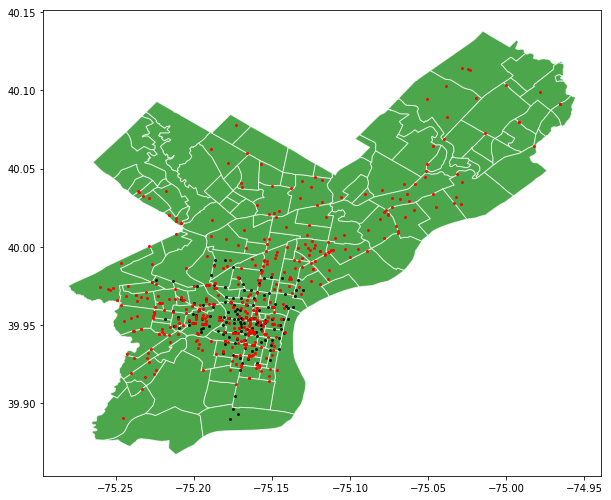

In [5]:
base=philly_map_gdf.plot(color='green', alpha=0.7, edgecolor='white', figsize=(10,10))
indego_stations_gdf.plot(ax=base, markersize=4, alpha=0.8, color='black')
bike_crash_gdf.plot(ax=base, markersize=4, alpha=0.9, color='red')

The stations and crashes have some overlap, but not as much as I had expected to see, particularly by the southern-most stations. 